# Restaurant Review Prediction

The Restaurant Review Prediction project aims to develop a machine learning model that can predict the sentiment of restaurant reviews based on textual data. The goal is to classify the reviews as positive or negative to provide insights into customer satisfaction and help restaurant owners understand customer sentiments.

# Importing Libraries

These are just a few examples of popular Python libraries. You can import any other library using the same import statement followed by the library name or alias:

NumPy: for numerical operations and array manipulation

Pandas: for data manipulation and analysis

Matplotlib: for creating visualizations

Scikit-learn: for machine learning algorithms

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# Importing Dataset

In [3]:
dataframe = pd.read_csv('Restaurant_Reviews.tsv', 
                        sep = '\t', 
                        quoting = 3)

# Exploring Dataset

Data exploration is an essential step in any machine learning project, including spam message classification. It involves gaining a deeper understanding of the dataset, its characteristics, and the relationships between its variables.

In [4]:
dataframe.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
dataframe.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


In [6]:
dataframe.shape

(1000, 2)

In [7]:
dataframe['Liked'].value_counts()

1    500
0    500
Name: Liked, dtype: int64

# Data Cleaning 

Data cleaning is an essential step in preparing your data for analysis or modeling. It involves identifying and handling inconsistencies, errors, missing values, outliers, and irrelevant information in your dataset. 

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [10]:
dataframe.columns

Index(['Review', 'Liked'], dtype='object')

In [11]:
positive = dataframe[dataframe['Liked'] == 1]
negative = dataframe[dataframe['Liked'] == 0]

In [12]:
positive.head()

,Review,Liked
0,Wow... Loved this place.,1
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
8,The fries were great too.,1
9,A great touch.,1


In [13]:
negative.head()

,Review,Liked
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


In [14]:
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Review'][i])
    review = review.lower()
    review = review.split()

    ps = PorterStemmer()
    all_stopwords = stopwords.words('english')
    all_stopwords.remove('not')

    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)

    corpus.append(review)


In [15]:
print(corpus)

['wow love place', 'crust not good', 'not tasti textur nasti', 'stop late may bank holiday rick steve recommend love', 'select menu great price', 'get angri want damn pho', 'honeslti tast fresh', 'potato like rubber could tell made ahead time kept warmer', 'fri great', 'great touch', 'servic prompt', 'would not go back', 'cashier care ever say still end wayyy overpr', 'tri cape cod ravoli chicken cranberri mmmm', 'disgust pretti sure human hair', 'shock sign indic cash', 'highli recommend', 'waitress littl slow servic', 'place not worth time let alon vega', 'not like', 'burritto blah', 'food amaz', 'servic also cute', 'could care less interior beauti', 'perform', 'right red velvet cake ohhh stuff good', 'never brought salad ask', 'hole wall great mexican street taco friendli staff', 'took hour get food tabl restaur food luke warm sever run around like total overwhelm', 'worst salmon sashimi', 'also combo like burger fri beer decent deal', 'like final blow', 'found place accid could not

CountVectorizer is a feature extraction technique used to convert a collection of text documents into a matrix of token counts. It is part of the text preprocessing and feature extraction module in scikit-learn, a popular machine learning library in Python.

CountVectorizer works by tokenizing the text data, building a vocabulary of known words, and representing each document as a vector of word frequencies or counts.

In [16]:
from sklearn.feature_extraction.text import CountVectorizer

In [17]:
cv = CountVectorizer(max_features = 1500)

In [18]:
x = cv.fit_transform(corpus).toarray()

In [19]:
y = dataframe.iloc[:, 1].values

In [20]:
x.shape, y.shape

((1000, 1500), (1000,))

# Splitting Dataset

Splitting a dataset refers to the process of dividing a given dataset into two or more subsets for training and evaluation purposes. The most common type of split is between the training set and the testing (or validation) set. This division allows us to assess the performance of a machine learning model on unseen data and evaluate its generalization capabilities.

Train-Test Split: This is the most basic type of split, where the dataset is divided into a training set and a testing set. The training set is used to train the machine learning model, while the testing set is used to evaluate its performance. The split is typically done using a fixed ratio, such as 80% for training and 20% for testing.

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

In [23]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

GaussianNB (Gaussian Naive Bayes) is a classification algorithm based on the Naive Bayes theorem and assumes that the features are normally distributed. It is part of the Naive Bayes family of algorithms and is particularly useful for solving classification problems with continuous features.

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
gaussian = GaussianNB()

In [26]:
gaussian.fit(x_train, y_train)

GaussianNB()

In [27]:
y_pred_gaussian = gaussian.predict(x_test)

# Error Analysis

Error analysis is a crucial step in evaluating and improving the performance of a spam message classification model. It involves analyzing the errors made by the model to gain insights into the types of misclassifications and identify patterns or common characteristics that contribute to these errors.

In [28]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [29]:
accuracy_score = accuracy_score(y_test, y_pred_gaussian)

In [30]:
accuracy_score

0.73

In [31]:
print(classification_report(y_test, y_pred_gaussian))

              precision    recall  f1-score   support

           0       0.82      0.57      0.67        97
           1       0.68      0.88      0.77       103

    accuracy                           0.73       200
   macro avg       0.75      0.73      0.72       200
weighted avg       0.75      0.73      0.72       200



In [32]:
confusion_matrix = confusion_matrix(y_test, y_pred_gaussian)

In [33]:
confusion_matrix

array([[55, 42],
       [12, 91]], dtype=int64)

<AxesSubplot:>

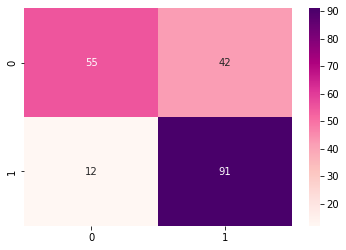

In [34]:
plt.figure(figsize = (6, 4))
sns.heatmap(confusion_matrix, 
            annot = True,
            cmap = 'RdPu')

# Prediction

In [42]:
print(y_test[4]), print(y_pred_gaussian[4])

0
0


(None, None)

In [44]:
print(y_test[34]), print(y_pred_gaussian[34])

1
1


(None, None)